<a href="https://colab.research.google.com/github/cjungerius/learning_notebooks/blob/master/LikelihoodExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import your packages (make sure they're all installed ofc :) )

In [114]:
!pip install numdifftools #remove if already installed
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import scipy.stats as stats
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

provide your data (I'm just generating some for X and Y here, you can just say `X=[...] ` and `Y = [...]` )

In [115]:
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ

Wow, a linear thing!

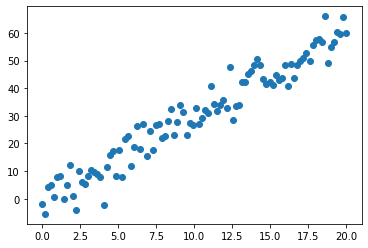

In [116]:
plt.scatter(x,y)

Provide a function to optimize (This can be anything, but I'm fitting a linear one here)

In [117]:
def MLELinearModel(params):
    #load in params
    intercept, beta, sd = params[0], params[1], params[2]
    #what does our function look like?
    yhat = intercept + beta*x
    #and *what is the LL?*
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat,scale=sd))
    #aaaaand return that
    return negLL

And now we just tell python to optimize this function! (i.e. minimize the neg log likelihood, which is equivalent to maximizing likelihood!)

In [118]:
#some starting params
guess = np.array([1,2,3])
results = minimize(MLELinearModel, guess, method = 'Nelder-Mead')
options = {'disp':True}

In [119]:
results

 final_simplex: (array([[-0.65347075,  3.05965167,  4.5881496 ],
       [-0.65337116,  3.05964347,  4.58815962],
       [-0.65346414,  3.05964631,  4.58813682],
       [-0.65338663,  3.05964889,  4.58812416]]), array([294.24130058, 294.24130058, 294.24130058, 294.24130058]))
           fun: 294.2413005780657
       message: 'Optimization terminated successfully.'
          nfev: 168
           nit: 91
        status: 0
       success: True
             x: array([-0.65347075,  3.05965167,  4.5881496 ])

How does this look compared to our data?

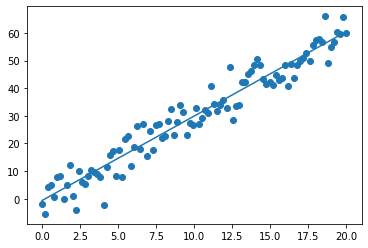

In [120]:
yhat = results.x[0]+results.x[1]*x
plt.plot(x,yhat)
plt.scatter(x,y)

(note that since our noise is gaussian this is equivalent to OLS:

[[-0.65342902]
 [ 3.05964798]]


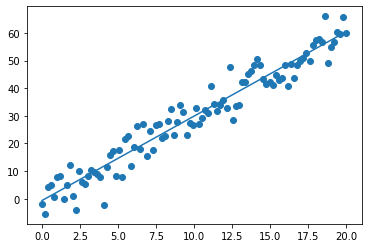

In [121]:
X = np.array(x) # note capital to denote design matrix
X = np.column_stack((np.ones_like(X), X))
y = np.array(y[:,np.newaxis])
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta) # exactly equal to the intercept and slope found by likelihood estimation
yhat = X@theta
plt.plot(x,yhat)
plt.scatter(x,y)

We can also do this for other functions ofc:

In [129]:
def MLEQuadraticModel(params):
    intercept, beta1, beta2, sd = params[0], params[1], params[2], params[3]
    yhat = intercept + beta1*x + beta2*x**2
    negLL = -np.sum(stats.norm.logpdf(y[:,0], loc=yhat,scale=sd))
    return negLL
guess = np.array([1,2,3,4])
results2 = minimize(MLEQuadraticModel, guess, method = 'Nelder-Mead')
options = {'disp':True}

print(results2)

 final_simplex: (array([[-9.05693624e-01,  3.13610004e+00, -3.82264773e-03,
         4.58665359e+00],
       [-9.05782637e-01,  3.13612182e+00, -3.82373296e-03,
         4.58665462e+00],
       [-9.05710386e-01,  3.13611075e+00, -3.82328503e-03,
         4.58664792e+00],
       [-9.05763198e-01,  3.13611689e+00, -3.82358002e-03,
         4.58665020e+00],
       [-9.05638865e-01,  3.13608823e+00, -3.82218900e-03,
         4.58665605e+00]]), array([294.20917897, 294.20917897, 294.20917897, 294.20917897,
       294.20917897]))
           fun: 294.2091789672212
       message: 'Optimization terminated successfully.'
          nfev: 590
           nit: 345
        status: 0
       success: True
             x: array([-9.05693624e-01,  3.13610004e+00, -3.82264773e-03,  4.58665359e+00])


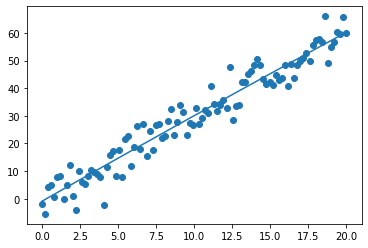

In [132]:
yhat2 = results2.x[0]+results2.x[1]*x + results2.x[2]*x**2
plt.plot(x,yhat2)
plt.scatter(x,y)

[[-0.90573952]
 [ 3.13611351]
 [-0.00382328]]


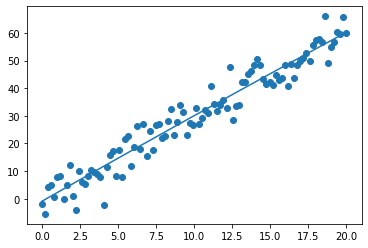

In [135]:
X = np.array(x)
X = np.column_stack((np.ones_like(X), X, X**2))
theta = np.linalg.inv(X.T@X) @ X.T @ y
print(theta) #again, equivalent to the MLL!
y_hat = X @ theta
plt.plot(x,y_hat)
plt.scatter(x,y)

obviously the fit isnt as good here (or rather, the fit is better but is overfitting, as we know), but this demonstrates how to generalize the approach!